In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE, SelectKBest, f_regression, f_oneway
import seaborn as sns


In C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [4]:
data['previous'].value_counts()

0      25924
1       1921
2       1481
3        780
4        501
5        311
6        188
7        138
8         81
9         64
10        49
11        46
13        30
12        30
15        15
14        14
17        11
19         8
16         8
23         6
18         5
20         5
27         4
22         4
21         4
25         4
29         2
24         2
26         2
35         1
275        1
28         1
58         1
37         1
30         1
32         1
41         1
38         1
Name: previous, dtype: int64

In [5]:
data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
columns_list = data.columns.tolist()
print(len(columns_list))
columns_list

18


['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [9]:
columns_list
data.drop(['ID'], axis=1, inplace=True)

In [10]:
data['subscribed'] = np.where(data['subscribed']=="no", 0, 1)

In [11]:
data['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

In [12]:
columns_list = data.columns.tolist()
print(len(columns_list))
columns_list

17


['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [13]:
num_att = data.select_dtypes(['int64', 'float64']).columns.tolist()
print(len(num_att))
num_att


7


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:
cat_att = data.dtypes.loc[(data.dtypes != 'int64') & (data.dtypes != 'float64'),].index.tolist()
print(len(cat_att))
cat_att

10


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

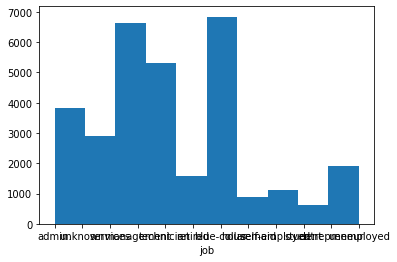

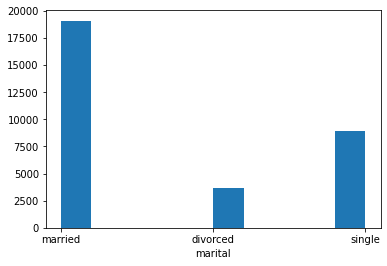

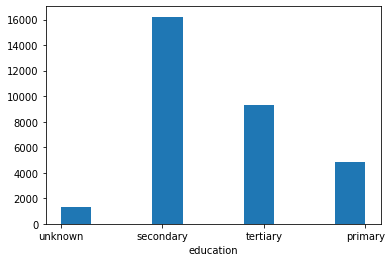

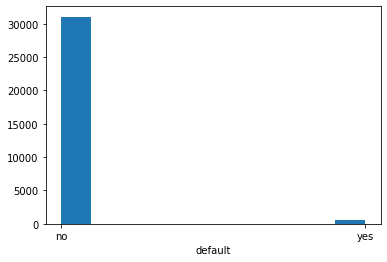

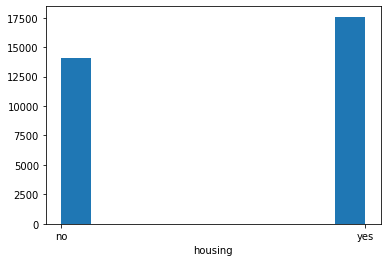

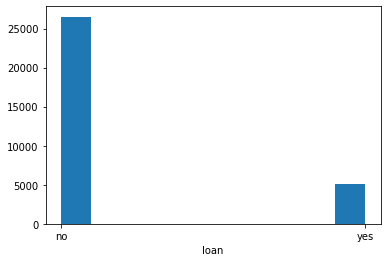

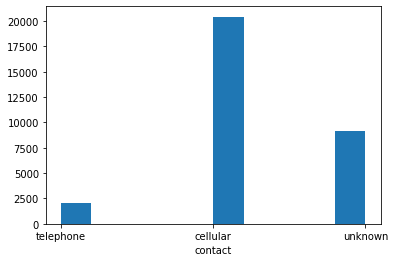

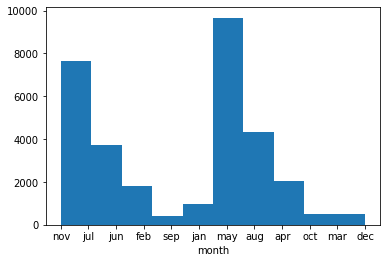

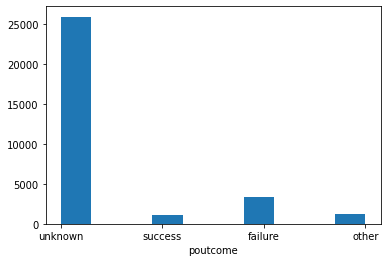

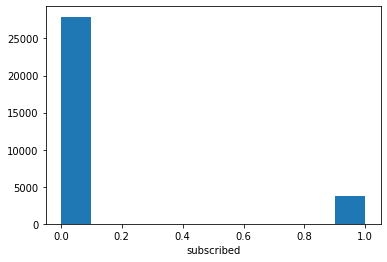

In [15]:
for col in cat_att:
    plt.hist(data[col])
    plt.xlabel(col)
    plt.show()

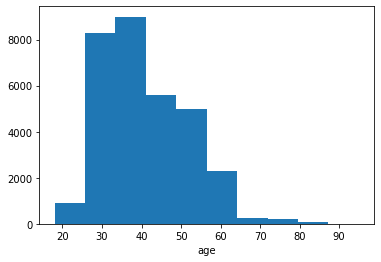

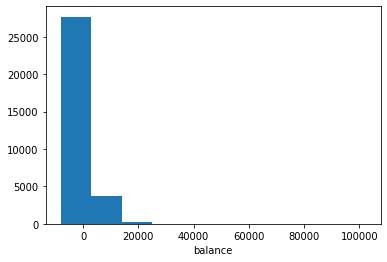

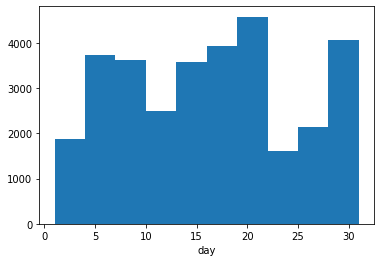

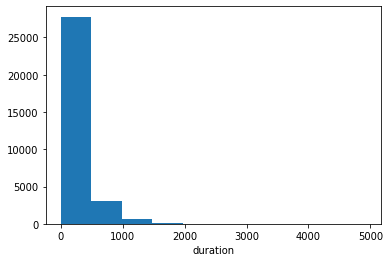

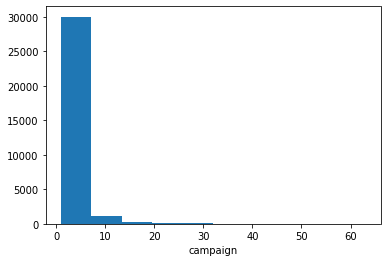

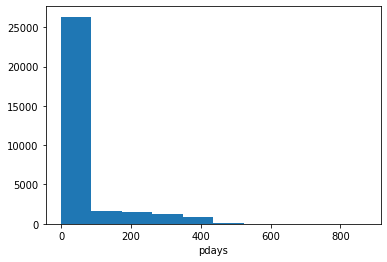

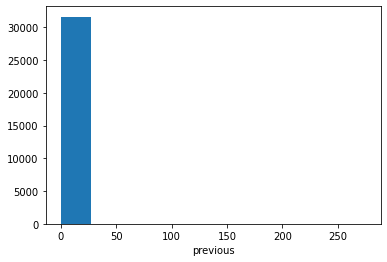

In [16]:
for col in num_att:
    plt.hist(data[col])
    plt.xlabel(col)
    plt.show()

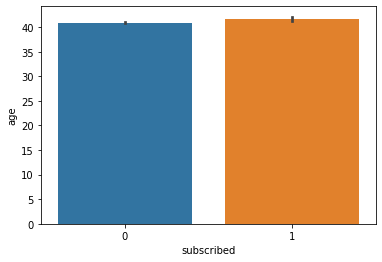

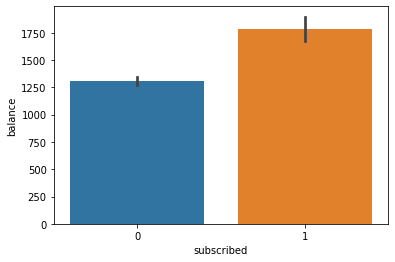

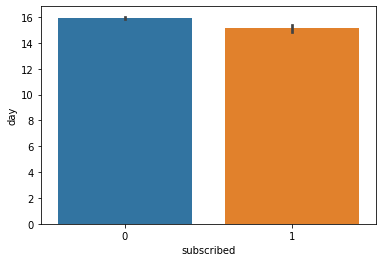

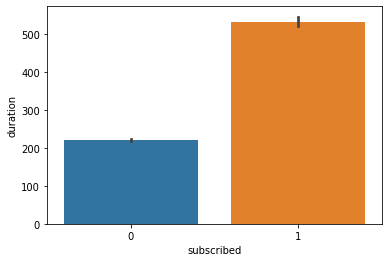

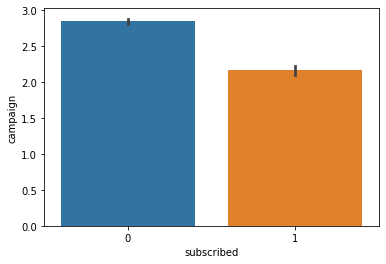

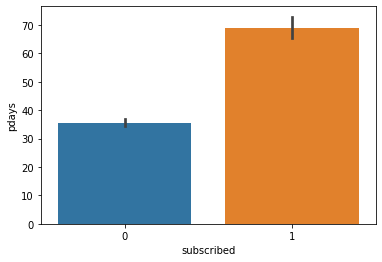

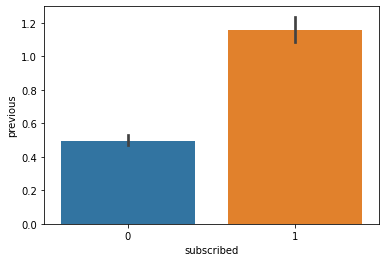

In [17]:
for col in num_att:
    sns.barplot(x = data['subscribed'], y = col, data=data)
    plt.show()

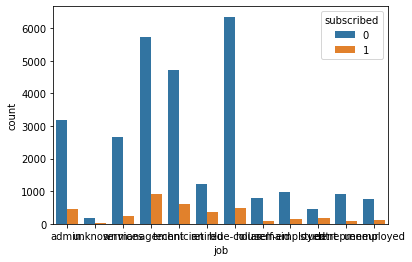

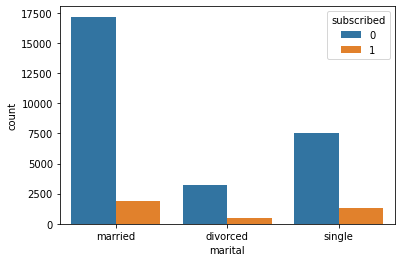

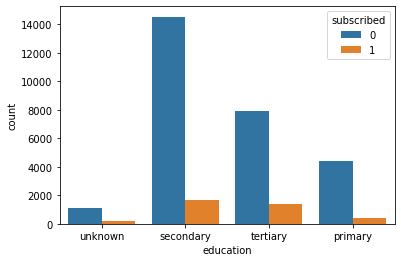

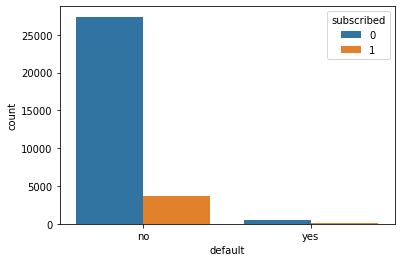

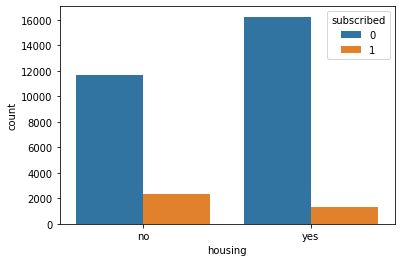

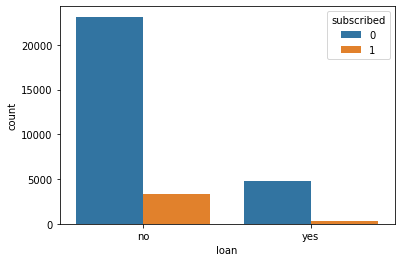

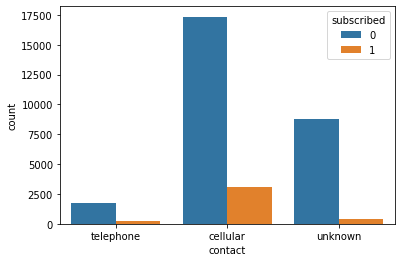

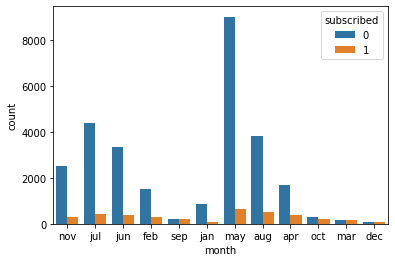

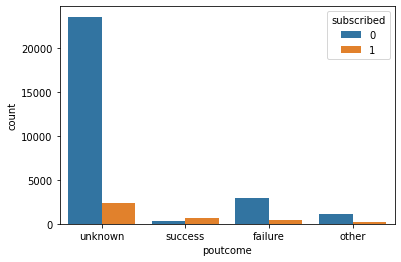

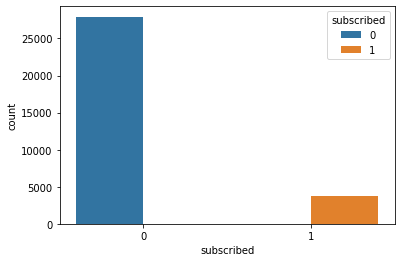

In [18]:
for col in cat_att:
    sns.countplot(x = col, hue=data['subscribed'], data = data)
    plt.show()

In [19]:
X_train = data.loc[:,"age":"poutcome"]
y_train=data['subscribed']

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(25317, 16)
(6330, 16)
(25317,)
(6330,)


In [22]:
num_att = X_train.select_dtypes(['int64', 'float64']).columns.tolist()
print(len(num_att))
num_att

7


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [23]:
cat_att = X_train.dtypes.loc[(X_train.dtypes != 'int64') & (X_train.dtypes != 'float64'),].index.tolist()
print(len(cat_att))
cat_att

9


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [24]:
scaler = StandardScaler()
scaler = scaler.fit(X_train[num_att])

In [25]:
X_train_num_attr = pd.DataFrame(scaler.transform(X_train[num_att]),columns=num_att)
X_train_num_attr.head()

,age,balance,day,duration,campaign,pdays,previous
0,0.285085,1.272858,1.701854,0.066302,-0.566934,-0.408178,-0.302067
1,1.227847,-0.382260,-1.182457,-0.964991,1.038123,-0.408178,-0.302067
2,-1.129057,-0.340054,1.701854,0.821004,-0.566934,-0.408178,-0.302067
3,-0.846229,0.796906,0.620238,-0.806939,0.075089,-0.408178,-0.302067
4,-0.280572,-0.441998,1.221136,-0.617276,0.396101,-0.408178,-0.302067


In [26]:
X_val_num_attr = pd.DataFrame(scaler.transform(X_val[num_att]), columns=num_att)
X_val_num_attr.head()

,age,balance,day,duration,campaign,pdays,previous
0,0.567914,-0.044289,1.581675,-0.261657,0.075089,1.882297,0.770504
1,1.039294,0.059603,0.500058,-0.561957,0.396101,-0.408178,-0.302067
2,-0.092020,0.135898,-0.581559,-0.565908,-0.566934,-0.408178,-0.302067
3,1.604951,-0.367650,-1.062278,-0.376245,1.359135,-0.408178,-0.302067
4,-0.186296,-0.350768,0.500058,-0.708156,1.359135,-0.408178,-0.302067


In [27]:
X_train_cat_attr = pd.get_dummies(X_train[cat_att], columns=cat_att, drop_first=True).reset_index(drop=True)

X_train_cat_attr.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
X_val_cat_attr = pd.get_dummies(X_val[cat_att], columns=cat_att, drop_first=True).reset_index(drop=True)
X_val_cat_attr.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [29]:
X_train_new_df = pd.concat([X_train_num_attr, X_train_cat_attr], axis=1)
X_train_new_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.285085,1.272858,1.701854,0.066302,-0.566934,-0.408178,-0.302067,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1.227847,-0.382260,-1.182457,-0.964991,1.038123,-0.408178,-0.302067,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.129057,-0.340054,1.701854,0.821004,-0.566934,-0.408178,-0.302067,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.846229,0.796906,0.620238,-0.806939,0.075089,-0.408178,-0.302067,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.280572,-0.441998,1.221136,-0.617276,0.396101,-0.408178,-0.302067,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
X_val_new_df = pd.concat([X_val_num_attr, X_val_cat_attr], axis=1)
X_val_new_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.567914,-0.044289,1.581675,-0.261657,0.075089,1.882297,0.770504,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.039294,0.059603,0.500058,-0.561957,0.396101,-0.408178,-0.302067,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,-0.092020,0.135898,-0.581559,-0.565908,-0.566934,-0.408178,-0.302067,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1.604951,-0.367650,-1.062278,-0.376245,1.359135,-0.408178,-0.302067,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.186296,-0.350768,0.500058,-0.708156,1.359135,-0.408178,-0.302067,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [31]:
log_model = LogisticRegression()

In [32]:
log_model.fit(X_train_new_df, y_train)

LogisticRegression()

In [33]:
y_train_pred = log_model.predict(X_train_new_df)

In [34]:
accuracy_score(y_train_pred, y_train)

0.900975629023976

In [35]:
y_val_pred = log_model.predict(X_val_new_df)

In [36]:
accuracy_score(y_val_pred, y_val)

0.9015797788309636

In [37]:
train_auc = metrics.roc_auc_score(y_train, log_model.predict(X_train_new_df))
test_auc = metrics.roc_auc_score(y_val, log_model.predict(X_val_new_df))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.6616580688431707
The AUC for the model built on the Test Data is :  0.6654541105517915


In [38]:
test_data = pd.read_csv('test.csv')

In [39]:
test_data.drop(['ID'], axis=1, inplace=True)

In [40]:
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [41]:
num_att_test = test_data.select_dtypes(['int64', 'float64']).columns.tolist()
print(len(num_att_test))
num_att_test

7


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [42]:
cat_att_test = test_data.dtypes.loc[(test_data.dtypes != 'int64') & (test_data.dtypes != 'float64'),].index.tolist()
print(len(cat_att_test))
cat_att_test

9


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [43]:
test_df_num = pd.DataFrame(scaler.fit_transform(test_data[num_att]), columns=num_att_test)

In [44]:
test_df_cat = pd.get_dummies(test_data[cat_att_test], columns=cat_att_test, drop_first=True)

In [45]:
new_test_data = pd.concat([test_df_num, test_df_cat], axis=1)

In [46]:
new_test_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,-0.838114,-0.402389,-0.089124,-0.921849,1.058702,-0.418199,-0.2975,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,3.499987,0.463375,-1.778340,0.439963,-0.574850,-0.418199,-0.2975,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,-0.932421,-0.393955,0.031534,1.616074,-0.574850,-0.418199,-0.2975,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.519549,0.784508,-0.330440,-0.747754,-0.248140,-0.418199,-0.2975,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.387871,-0.669352,-1.537023,-0.569789,-0.574850,-0.418199,-0.2975,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [47]:
y_test_pred = log_model.predict(new_test_data)
y_test_pred = pd.DataFrame(y_test_pred)
new_test_data['predicted'] = y_test_pred

In [48]:
new_test_data['predicted'].value_counts()

0    12699
1      865
Name: predicted, dtype: int64

conclusion: as per logistic regression the Auc and roc curve from train and val data is 0.66 
if probality > 0.67 they are to call if it is less we will not call the

# Decision_Tree_CLassifier

In [49]:
X_train_new_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.285085,1.272858,1.701854,0.066302,-0.566934,-0.408178,-0.302067,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1.227847,-0.382260,-1.182457,-0.964991,1.038123,-0.408178,-0.302067,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.129057,-0.340054,1.701854,0.821004,-0.566934,-0.408178,-0.302067,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.846229,0.796906,0.620238,-0.806939,0.075089,-0.408178,-0.302067,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.280572,-0.441998,1.221136,-0.617276,0.396101,-0.408178,-0.302067,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
X_val_new_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.567914,-0.044289,1.581675,-0.261657,0.075089,1.882297,0.770504,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.039294,0.059603,0.500058,-0.561957,0.396101,-0.408178,-0.302067,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,-0.092020,0.135898,-0.581559,-0.565908,-0.566934,-0.408178,-0.302067,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1.604951,-0.367650,-1.062278,-0.376245,1.359135,-0.408178,-0.302067,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.186296,-0.350768,0.500058,-0.708156,1.359135,-0.408178,-0.302067,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [51]:
y_train.head()

18361    0
2232     0
24219    1
15644    0
8354     0
Name: subscribed, dtype: int32

In [52]:
y_val.head()

1923     0
20759    0
4413     0
10495    0
25014    0
Name: subscribed, dtype: int32

In [53]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [54]:
dtclf = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [55]:
dtclf.fit(X_train_new_df, y_train)

DecisionTreeClassifier(max_depth=3)

In [56]:
y_train_dt_pred = dtclf.predict(X_train_new_df)

In [57]:
accuracy_score(y_train, y_train_dt_pred)

0.899909151953233

In [58]:
importances = dtclf.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.59320819, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01962109, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05744554,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.32972519, 0.        ])

In [59]:
indices = np.argsort(importances)[::-1]
ind_attr_names = X_train_new_df.columns
pd.DataFrame([ind_attr_names[indices], np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,duration,poutcome_success,month_mar,contact_unknown,job_management,job_unknown,job_unemployed,job_technician,job_student,job_services,...,month_feb,education_tertiary,month_dec,month_aug,contact_telephone,loan_yes,housing_yes,default_yes,education_unknown,age
1,0.593208,0.329725,0.0574455,0.0196211,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
dtclf.classes_

array([0, 1])

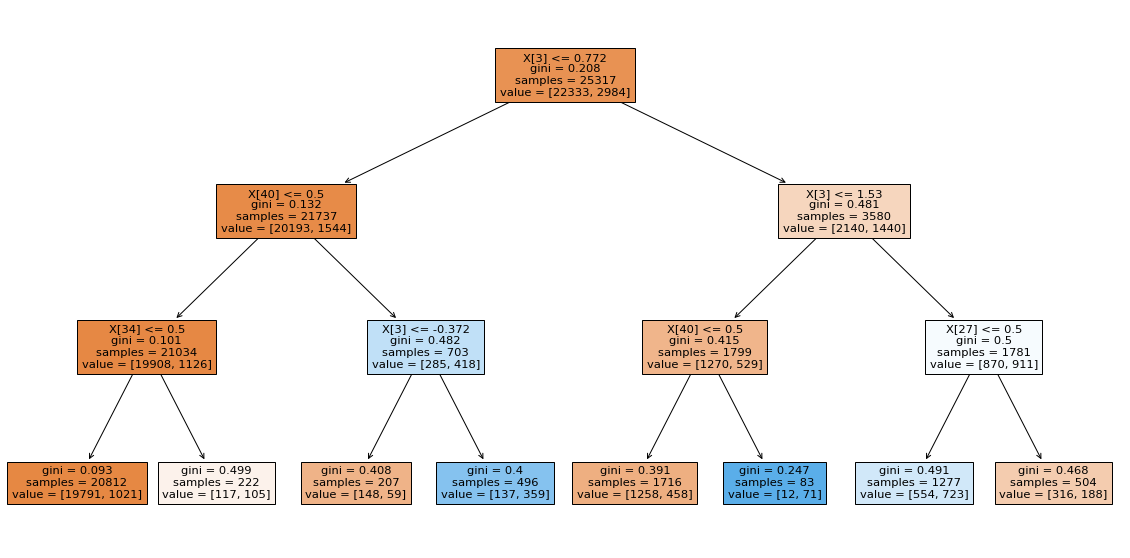

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtclf,filled=True)
plt.show()

# Without_standerdising the data

In [62]:
M = pd.concat([X_train[num_att].reset_index(drop= True), X_train_cat_attr.reset_index(drop= True)], axis=1)

In [63]:
N = pd.concat([X_val[num_att].reset_index(drop= True), X_val_cat_attr.reset_index(drop= True)], axis=1)

In [64]:
N.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,47,1225,29,191,3,227,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52,1545,20,115,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,40,1780,11,114,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,58,229,7,162,7,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,39,281,20,78,7,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [65]:
new_dt = DecisionTreeClassifier(criterion='gini')

In [66]:
new_dt.fit(M,y_train)

DecisionTreeClassifier()

In [67]:
pred_y_train = new_dt.predict(M)

In [68]:
pred_y_val = new_dt.predict(N)

In [69]:
accuracy_score(y_train, pred_y_train)

1.0

In [70]:
accuracy_score(y_val, pred_y_val)

0.8635071090047394

# Pruning Decision Tree

In [71]:
acc_score_test = []
acc_score_train = []

for i in range(1, 20):
    new_tree = DecisionTreeClassifier(criterion='entropy',  max_depth = i)
    new_tree.fit(M, y_train)
    pred_y_train = new_tree.predict(M)
    pred_y_test = new_tree.predict(N)
    acc_score_train.append(accuracy_score(y_train, pred_y_train))
    acc_score_test.append(accuracy_score(y_val, pred_y_test))

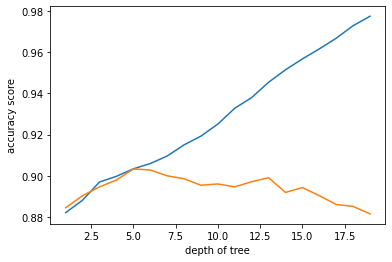

In [72]:
plt.plot(range(1,20), acc_score_train)
plt.plot(range(1,20), acc_score_test)
plt.xlabel("depth of tree")
plt.ylabel("accuracy score")
plt.show()

In [73]:
dt_final_model = DecisionTreeClassifier(criterion='entropy',  max_depth = 5)

In [74]:
dt_final_model.fit(M, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [75]:
pre_train_final = dt_final_model.predict(M)
pre_val_final = dt_final_model.predict(N)

In [76]:
accuracy_score(y_train, pre_train_final)

0.9033850772208397

In [77]:
accuracy_score(y_val, pre_val_final)

0.9033175355450237

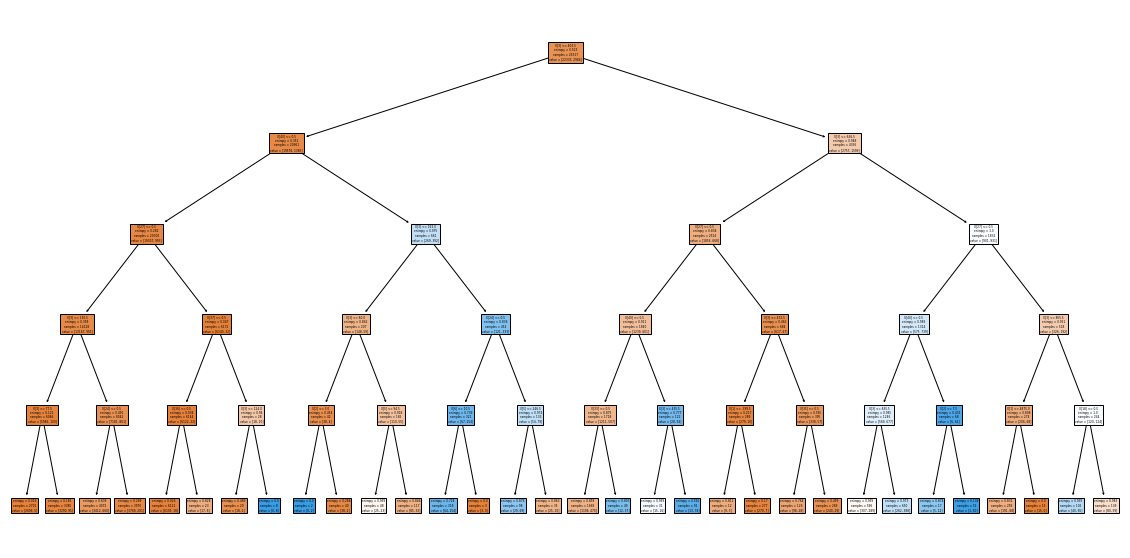

In [78]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_final_model,filled=True)
plt.show()

In [79]:
test_data = pd.read_csv('test.csv')

In [80]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [81]:
test_data.drop(['ID'], axis=1, inplace=True)

In [82]:
num_att_test = test_data.select_dtypes(['int64', 'float64']).columns.tolist()
print(len(num_att_test))
num_att_test

7


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [83]:
cat_att_test = test_data.dtypes.loc[(test_data.dtypes != 'int64') & (test_data.dtypes != 'float64'),].index.tolist()
print(len(cat_att_test))
cat_att_test

9


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [84]:
test_df_cat = pd.get_dummies(test_data[cat_att_test], columns=cat_att_test, drop_first=True)

In [85]:
test_data_new = pd.concat([test_data[num_att_test], test_df_cat], axis=1)
test_data_new.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,15,20,6,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,78,2787,1,372,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,31,144,16,676,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,57,3777,13,65,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,45,-705,3,111,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [86]:
pred_test = dt_final_model.predict(test_data_new)
pred_test = pd.DataFrame(pred_test)
test_data_new["pred_test"] = pred_test
test_data_new.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,pred_test
0,32,118,15,20,6,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,78,2787,1,372,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,31,144,16,676,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,57,3777,13,65,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,45,-705,3,111,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Conculsion : on an over all model fits fine in both logistic and Decision Tree classifier, In case of explainability DT is best model compared to logistic regression